<a href="https://colab.research.google.com/github/NoamTene/Udemy/blob/master/Udemy4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy  as np
import plotly.express  as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import math

from matplotlib import cm
plt.style.use('ggplot')

The following raw github is a frozen version of https://www.kaggle.com/andrewmvd/udemy-courses/download.  We believe that this file is just a small sample of all Udemy offerings but have chosen to use it as a snapshot of older course stats so we can compare them with more recent values and see if and how they changed.

In [84]:
df1 = pd.read_csv('https://raw.githubusercontent.com/NoamTene/Udemy/master/datasets_646598_1162286_udemy_courses.csv')
print(df1.shape)
df1.count()

(3678, 12)


course_id              3678
course_title           3678
url                    3678
is_paid                3678
price                  3678
num_subscribers        3678
num_reviews            3678
num_lectures           3678
level                  3678
content_duration       3678
published_timestamp    3678
subject                3678
dtype: int64

In [89]:
df1.drop_duplicates(inplace=True)
df1.count()

course_id              3672
course_title           3672
url                    3672
is_paid                3672
price                  3672
num_subscribers        3672
num_reviews            3672
num_lectures           3672
level                  3672
content_duration       3672
published_timestamp    3672
subject                3672
dtype: int64

df1.count()
The following file was generated by David Margulis for a Class project presumably using the code in UdemyDavid_MakeNewSnapshot_TRY.ipynb within this github repository.  David has edited the text manually before passing it on to this frozen version.

In [90]:
df2= pd.read_csv('https://raw.githubusercontent.com/NoamTene/Udemy/master/Rates_9July_new.csv')
print(df2.shape)
df2.count()

(3678, 15)


CourseID       3678
ReadStat       3678
Rate1          2670
Rate2          2670
Rate3          2670
Rate4          2670
Rate5          2670
Sum            2670
NewEnrolled    2724
UpdateDate     3668
Upd_monthes    2424
Orig_Price     2599
Curr_Price     2599
Discount       2599
Time           3668
dtype: int64

In [94]:
df2.drop_duplicates(subset='CourseID',inplace=True)
df2.count()

CourseID       3672
ReadStat       3672
Rate1          2666
Rate2          2666
Rate3          2666
Rate4          2666
Rate5          2666
Sum            2666
NewEnrolled    2720
UpdateDate     3662
Upd_monthes    2420
Orig_Price     2595
Curr_Price     2595
Discount       2595
Time           3662
dtype: int64

In [95]:
df1.sample(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2791,657710,Ruby on Rails for Complete Beginners,https://www.udemy.com/ruby-on-rails-tutorial-f...,True,35,4839,129,84,Beginner Level,4.00,2015-11-02T23:07:56Z,Web Development
159,576946,Introduction to bookkeeping and Accounting,https://www.udemy.com/introduction-to-bookkeep...,True,35,2623,158,20,Beginner Level,1.00,2015-08-21T20:33:25Z,Business Finance
726,665866,Investment Portfolio Analysis with Excel,https://www.udemy.com/investment-portfolio-ana...,True,50,154,7,39,All Levels,9.00,2015-11-12T21:51:19Z,Business Finance
3078,515188,HTML Learning the Basics Intro to HTML website...,https://www.udemy.com/html-learning-the-basics...,True,20,7416,65,14,Beginner Level,0.65,2015-05-31T21:28:27Z,Web Development
1729,502204,Dibujo digital básico: cómo ilustrar en Photoshop,https://www.udemy.com/dibujo-digital-basico-co...,True,20,155,36,90,Beginner Level,5.00,2016-02-17T23:56:26Z,Graphic Design


In [96]:
df2.sample(5)

,CourseID,ReadStat,Rate1,Rate2,Rate3,Rate4,Rate5,Sum,NewEnrolled,UpdateDate,Upd_monthes,Orig_Price,Curr_Price,Discount,Time
3037,680180,OK,5.0,9.0,38.0,51.0,53.0,156.0,1136.0,12/2018,19.0,159.99,95.99,40.0,2020-07-09 16:30:04
2674,559512,OK,37.0,28.0,51.0,83.0,108.0,307.0,26404.0,8/2015,59.0,799.99,479.99,40.0,2020-07-09 16:18:06
2592,314462,NoRates,NaN,NaN,NaN,NaN,NaN,NaN,117819.0,0/0,NaN,0.00,0.00,0.0,2020-07-09 15:49:08
3389,990532,OK,11.0,16.0,42.0,76.0,92.0,237.0,1566.0,11/2018,20.0,499.99,299.99,40.0,2020-07-09 17:13:55
2814,695656,OK,51.0,71.0,324.0,492.0,537.0,1475.0,75350.0,1/2016,54.0,799.99,479.99,40.0,2020-07-09 16:22:27


# Sanity check: Verify that Sum is redundant.

In [97]:
df2[(df2.Rate1+df2.Rate2+df2.Rate3+df2.Rate4+df2.Rate5!=df2.Sum)  & (df2.Sum==df2.Sum)] 

,CourseID,ReadStat,Rate1,Rate2,Rate3,Rate4,Rate5,Sum,NewEnrolled,UpdateDate,Upd_monthes,Orig_Price,Curr_Price,Discount,Time


Sanity check: Verify that df1.is_paid is redundant

In [98]:
df1[(df1.is_paid)^(df1.price!=0)] 

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


In [99]:
df2.columns=['course_id','status','rating1','rating2','rating3','rating4','rating5','rating_tot','new_subscribers','new_pub_date','upd_month','new_price','curr_price','discount','timestamp']
df1.columns=['course_id','title','url','is_paid','old_price','old_subscribers','num_reviews','num_lectures','level','duration','old_pub_date','subject']

In [100]:
df = df1.join(df2.set_index('course_id'),on='course_id')
df.sample(5)

,course_id,title,url,is_paid,old_price,old_subscribers,num_reviews,num_lectures,level,duration,old_pub_date,subject,status,rating1,rating2,rating3,rating4,rating5,rating_tot,new_subscribers,new_pub_date,upd_month,new_price,curr_price,discount,timestamp
3186,926206,HTML5 and CSS3 : Landing Pages for Entrepreneu...,https://www.udemy.com/landing-pages-for-entrep...,True,195,2354,16,45,All Levels,4.0,2016-08-12T15:50:50Z,Web Development,OK,2.0,1.0,3.0,4.0,18.0,28.0,3408.0,10/2016,45.0,779.99,467.99,40.0,2020-07-09 16:35:22
192,537884,Leasing - A Comprehensive Study (Professional ...,https://www.udemy.com/leasing-a-comprehensive-...,True,20,3094,2,22,All Levels,3.5,2015-07-17T22:10:39Z,Business Finance,NoRates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0/0,NaN,NaN,NaN,NaN,2020-07-09 13:40:25
2426,592606,Spielend Klavier lernen mit Freude und Erfolg,https://www.udemy.com/spielend-klavier-lernen/,True,100,255,30,53,Beginner Level,4.0,2015-11-12T06:40:19Z,Musical Instruments,NoRates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0/0,NaN,NaN,NaN,NaN,2020-07-09 15:38:40
253,190816,IAS 18 - Revenue,https://www.udemy.com/ias-18-revenue/,False,0,2571,32,23,All Levels,4.5,2014-03-29T14:10:31Z,Business Finance,NoRates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0/0,NaN,NaN,NaN,NaN,2020-07-09 13:42:27
1635,327666,Digital Art for Beginners,https://www.udemy.com/digital-art-101-from-beg...,True,150,3381,388,57,Beginner Level,15.0,2016-02-14T23:43:10Z,Graphic Design,OK,45.0,89.0,407.0,1158.0,1572.0,3271.0,24309.0,6/2020,1.0,599.99,359.99,40.0,2020-07-09 14:44:05


A naive first attempt to plot a histogram of the number of subscribers does not give much information:

In [101]:
print(df1.shape)
print(df2.shape)
print(df.shape)

(3672, 12)
(3672, 15)
(3672, 26)


In [102]:
df.columns

Index(['course_id', 'title', 'url', 'is_paid', 'old_price', 'old_subscribers',
       'num_reviews', 'num_lectures', 'level', 'duration', 'old_pub_date',
       'subject', 'status', 'rating1', 'rating2', 'rating3', 'rating4',
       'rating5', 'rating_tot', 'new_subscribers', 'new_pub_date', 'upd_month',
       'new_price', 'curr_price', 'discount', 'timestamp'],
      dtype='object')

In [106]:
df.count()

course_id          3672
title              3672
url                3672
is_paid            3672
old_price          3672
old_subscribers    3672
num_reviews        3672
num_lectures       3672
level              3672
duration           3672
old_pub_date       3672
subject            3672
status             3672
rating1            2666
rating2            2666
rating3            2666
rating4            2666
rating5            2666
rating_tot         2666
new_subscribers    2720
new_pub_date       3662
upd_month          2420
new_price          2595
curr_price         2595
discount           2595
timestamp          3662
old_revenue        3672
new_revenue        2592
student_lect       3672
lect_price         3672
dtype: int64

In [107]:
df['old_revenue'] = df.old_price*df.old_subscribers
df['new_revenue'] = df.new_price*df.new_subscribers
df['old_revenue'] = df.old_price*df.old_subscribers
df['new_revenue'] = df.new_price*df.new_subscribers
df['student_lect'] = df.num_lectures*df.old_subscribers
df['lect_price'] = df.old_price/df.num_lectures

In [112]:
dfc = df[(~np.isnan(df.new_subscribers)) & ~np.isnan(df.new_price)]
dfc.shape

(2592, 30)

In [113]:
dfc.to_csv('UdemyA.csv')

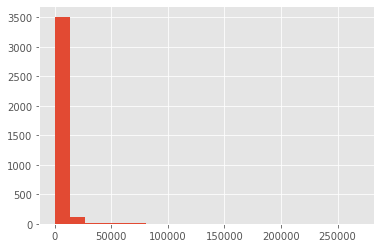

In [ ]:
plt.hist(df.num_subscribers,bins=20);

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



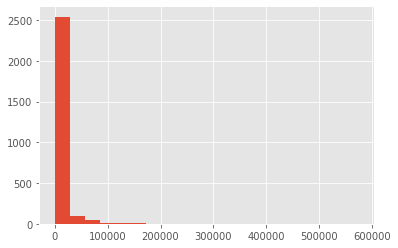

In [ ]:
plt.hist(df2.NewEnrolled,bins=20);

The first naive attempt does tells us a few things that are helpful in generating a more meaningful plot:

1. Most of the courses are in the lowest bin with much less than 50,000 subscribers
2. There must be a few courses with more than 250,000 subscribers listed even though we can not see them on this scale.  Otherwise the x-axis would not extend that far.
3. A log plot may at least make it possible to see these few outliers.
4. Using more histogram bins may help see the details

sum(num_subscribers)= 11759120


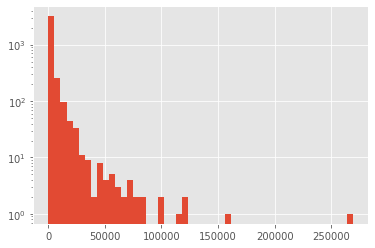

In [ ]:
print("sum(num_subscribers)=",df.num_subscribers.sum())
plt.yscale('log')
plt.hist(df.num_subscribers,bins=50);

sum(NewEnrolled)= 24958999.0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



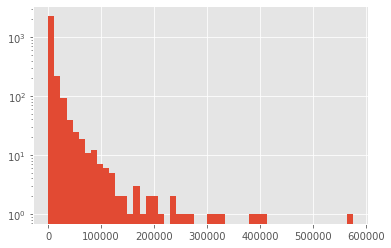

In [ ]:
print("sum(NewEnrolled)=",df2.NewEnrolled.sum())
plt.yscale('log')
plt.hist(df2.NewEnrolled,bins=50);

We can now see that there is indeed only one course with more than 250,000 subscribers which is more than 2% of all subscribers in the data set.
We also see that there are only a few others with more than 80,000.  

We can not ignore these few outliers because as few as they are, they represent a significant percentage of the total Udemy subscribers (and the corresponding enrollment and possible revenue).  However, we already know that they form their own category and need to be analyzed separately if we want our statistical analysis to have any meaning.

For now lets try to zoom in on the majority of the courses.

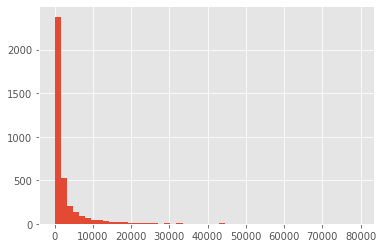

In [ ]:
plt.hist(df.query("num_subscribers<80000").num_subscribers,bins=50);

Apparently most of the courses still cluster in the lower end bins with fewer than 10,000 subscribers and there are still some large courses that get drowned out if we do not use the log scale - so lets bring it back:

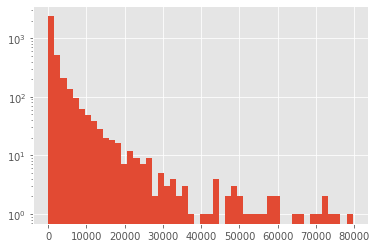

In [ ]:
plt.hist(df.query("num_subscribers<80000").num_subscribers,bins=50)
plt.yscale('log')

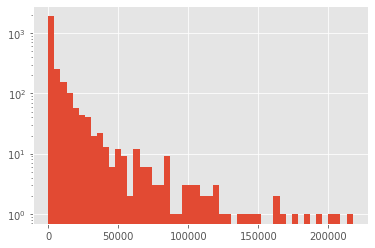

In [ ]:
plt.hist(df2.query("NewEnrolled<230000").NewEnrolled,bins=50)
plt.yscale('log')

We can now see three distinct regions in the subscriber data:
1. Many courses have less than 2000 subscribers.
2. There is a middle region where a linear fit (to a log scale) might do a reasonable job of approximating the data.
3. Courses with more than 40,000 subscribers probably belong with the few outlier we took out earlier.

Lets try to zoom in some more and remove the log scale:

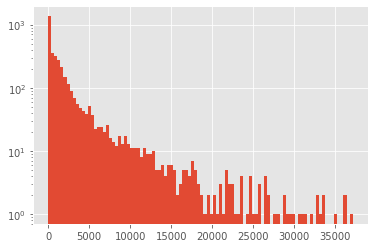

In [ ]:
plt.hist(df.query("num_subscribers<40000").num_subscribers,bins=100);
plt.yscale('log')

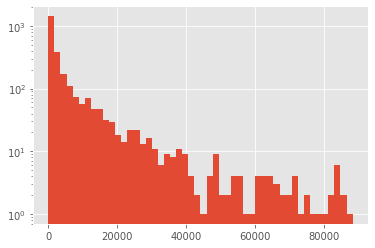

In [ ]:
plt.hist(df2.query("NewEnrolled<90000").NewEnrolled,bins=50);
plt.yscale('log')

In [ ]:
plt.hist(df2.query("num_subscribers<40000").num_subscribers,bins=50);

With the log scale removed, the area under the histogram might tells us something meaningful about the distribution of course sizes.  But we are not there yet ...

We know from the earlier log plot that there are more than 10 courses with at least 30,000 subscribers each that are drowned out by the vertical scale of this plot.

Let's take a closer look at the courses on the lower end of the subscriber numbers that are drowning out our real data.  There may be a large number of these courses but with their low attentance they represent only a small portion of the student population:

sum(num_subscribers<= 500 ):  190964
sum(num_subscribers    )=  11759120
Number of courses with num_subscribers<  20:  443
Number of courses with num_subscribers<= 500 ):  1509
Number of courses                          : 3678


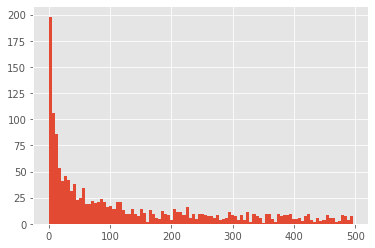

In [ ]:
thr = 500
print("sum(num_subscribers<=",thr,'): ', df.query("num_subscribers<"+str(thr)).num_subscribers.sum())
print("sum(num_subscribers    )= ",                                 df.num_subscribers.sum())
plt.hist(df.query("num_subscribers<@thr").num_subscribers,bins=100);
print("Number of courses with num_subscribers<  20: ",df.query("num_subscribers< 20").shape[0])
print("Number of courses with num_subscribers<=",thr,'): ',df.query("num_subscribers<"+str(thr)).shape[0])
print("Number of courses                          :",                              df.shape[0])


Let's plot the cumulative number of subscribers when we sort the data:

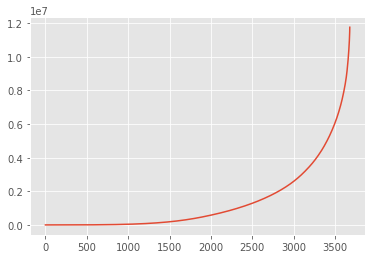

In [ ]:
Sorted_subsc = df.num_subscribers.sort_values()
cum_subsc=np.cumsum(Sorted_subsc).reset_index(drop=True)
plt.plot(cum_subsc)

We see that the lower 3000 courses (about 80% of the courses) have fewer than 25% of the total subscribers.  Most of the subscribers are enrolled in the top 20% of courses (in terms of popularity) - which should not be surprising.  What it does tell us is that we need to be careful in applying statistical tools like averages and medians which are meaningless in this type of data.

In [ ]:
piv = (df.pivot_table(index='subject', columns='num_subscribers',values='course_id', aggfunc = 'count')).T
piv

subject,Business Finance,Graphic Design,Musical Instruments,Web Development
num_subscribers,,,,
0,40.0,19.0,11.0,NaN
1,17.0,21.0,11.0,NaN
2,13.0,9.0,5.0,NaN
3,6.0,10.0,10.0,NaN
4,11.0,7.0,8.0,NaN
...,...,...,...,...
114512,NaN,NaN,NaN,1.0
120291,NaN,NaN,NaN,1.0
121584,NaN,NaN,NaN,1.0


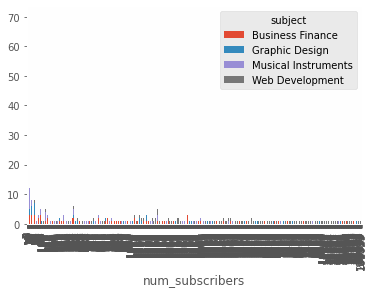

In [ ]:
piv.plot(kind='bar',stacked=True)
plt.show()

In [ ]:
piv.hist(df.query("num_subscribers<100").num_subscribers,bins=100);

KeyError: ignored